#### This is the programming code for case study two: LIME. The code includes the experiments for LIME explaining image classification problems using a train model: inception_v3 based on five images.

In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.5.0


# The First Image

## Prediction

In [2]:
# load the trained model
model = inc_net.InceptionV3()

In [3]:
# perprocessing the image
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n02123394', 'Persian_cat', 0.2625309)
('n02123045', 'tabby', 0.07363854)
('n02124075', 'Egyptian_cat', 0.048016366)
('n02123159', 'tiger_cat', 0.04637281)
('n02127052', 'lynx', 0.031589795)


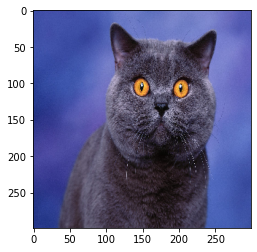

In [4]:
# load the first image
images1 = transform_img_fn([os.path.join('./','cat1.jpeg')])
plt.imshow(images1[0]/2+0.5)
# predict the first image
preds = model.predict(images1)
for x in decode_predictions(preds)[0]:
    print(x)

## Explanation

In [6]:
import os,sys
import lime
from lime import lime_image
import time

In [7]:
start = time.clock()
# generate the LIME image explainer
explainer = lime_image.LimeImageExplainer()
end = time.clock()
# calculate the runtime
print('The time consumption of the function is: ',end-start,'(s).')
start = time.clock()
# explain the image
explanation = explainer.explain_instance(
    images1[0].astype('double'), model.predict, top_labels=5, 
    hide_color=0, num_samples=1000)
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')

The time consumption of the function is:  0.0001501 (s).



The time consumption of the function is:  141.2943813 (s).


### Explanation for top one prediction

In [12]:
from skimage.segmentation import mark_boundaries

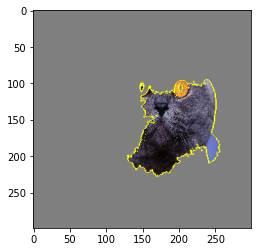

In [32]:
# plot the explanation result: The most relevant part of the highest probability prediction of the first image with hidden irrelevant part.
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = True)
plt.imshow(mark_boundaries(temp/2+0.5,mask))

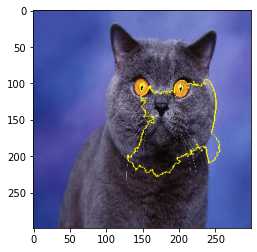

In [33]:
# plot the explanation result: The most relevant part of the highest probability prediction of the first image without hidden irrelevant part.
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = False)
plt.imshow(mark_boundaries(temp/2+0.5,mask))

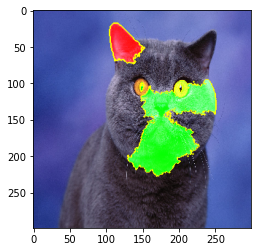

In [35]:
# plot the explanation result: The positive and negative parts of the highest probability prediction of the first image without hidden irrelevant part.
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = False,
                                           num_features = 5,
                                           hide_rest = False)
plt.imshow(mark_boundaries(temp/2+0.5,mask))

### Map

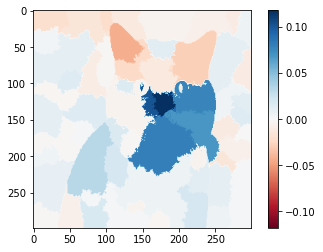

In [8]:
# The heatmap visualization of the first image based on the highest probability prediction.
ind = explanation.top_labels[0]

dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# The Second Image

('n02123159', 'tiger_cat', 0.5627805)
('n02123045', 'tabby', 0.3229583)
('n02124075', 'Egyptian_cat', 0.05280482)
('n02127052', 'lynx', 0.003950849)
('n03958227', 'plastic_bag', 0.0018872775)


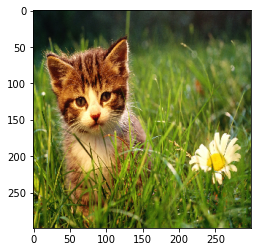

In [9]:
# load the second image
images2 = transform_img_fn([os.path.join('./','cat2.jpeg')])
plt.imshow(images2[0]/2+0.5)
# predict the second image
preds = model.predict(images2)
for x in decode_predictions(preds)[0]:
    print(x)

In [10]:
start = time.clock()
# generate the LIME image explainer
explainer = lime_image.LimeImageExplainer()
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')
start = time.clock()
# explain the image
explanation = explainer.explain_instance(
    images2[0].astype('double'), model.predict, top_labels=5, 
    hide_color=0, num_samples=1000)
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')

The time consumption of the function is:  0.00012799999998946987 (s).



The time consumption of the function is:  143.92574539999998 (s).


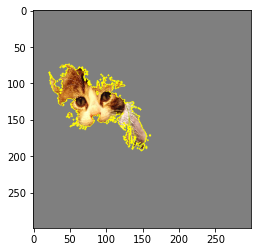

In [16]:
# plot the explanation result: The most relevant part of the fifth prediction of the second image with hidden irrelevant part.
temp, mask = explanation.get_image_and_mask(explanation.top_labels[4],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = True)
plt.imshow(mark_boundaries(temp/2+0.5,mask))

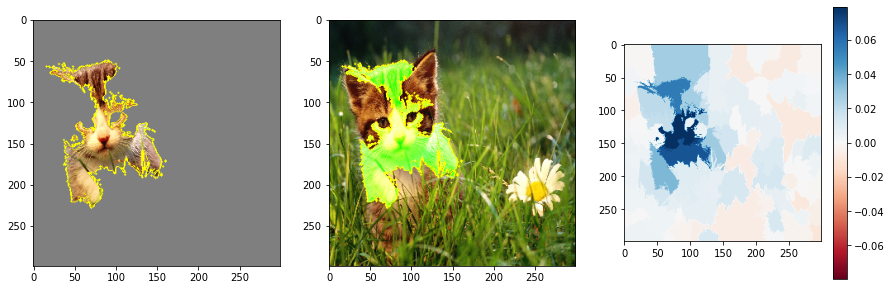

In [22]:
# plot the explanation results
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = True)

temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = False,
                                           num_features = 5,
                                           hide_rest = False)
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(temp1/2+0.5,mask1))
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(temp2/2+0.5,mask2))
plt.subplot(1,3,3)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

('n02099601', 'golden_retriever', 0.6500445)
('n02099712', 'Labrador_retriever', 0.21111594)
('n03223299', 'doormat', 0.0050164475)
('n04409515', 'tennis_ball', 0.0029192225)
('n02807133', 'bathing_cap', 0.0028167414)


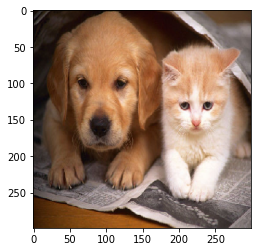

In [17]:
images3 = transform_img_fn([os.path.join('./','cat_dog.jpeg')])
plt.imshow(images3[0]/2+0.5)
preds = model.predict(images3)
for x in decode_predictions(preds)[0]:
    print(x)

In [18]:
start = time.clock()
# generate the LIME image explainer
explainer = lime_image.LimeImageExplainer()
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')
start = time.clock()
# explain the image
explanation = explainer.explain_instance(
    images3[0].astype('double'), model.predict, top_labels=5, 
    hide_color=0, num_samples=1000)
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')

The time consumption of the function is:  0.00020250000000032742 (s).



The time consumption of the function is:  136.46373489999996 (s).


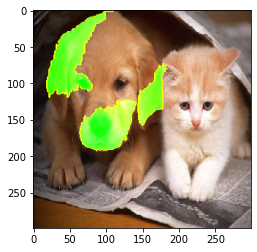

In [26]:
# plot the explanation result: The positive and negative parts of the highest probability prediction of the third image without hidden irrelevant part.
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = False,
                                           num_features = 5,
                                           hide_rest = False)
plt.imshow(mark_boundaries(temp/2+0.5,mask))

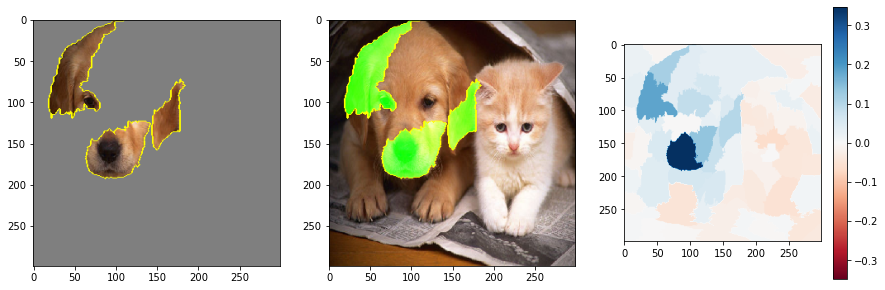

In [27]:
# plot the explanation results
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = True)

temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = False,
                                           num_features = 5,
                                           hide_rest = False)
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(temp1/2+0.5,mask1))
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(temp2/2+0.5,mask2))
plt.subplot(1,3,3)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

('n03388183', 'fountain_pen', 0.8996575)
('n02783161', 'ballpoint', 0.061722025)
('n04116512', 'rubber_eraser', 0.0032586262)
('n04141327', 'scabbard', 0.001850853)
('n06785654', 'crossword_puzzle', 0.0013432332)


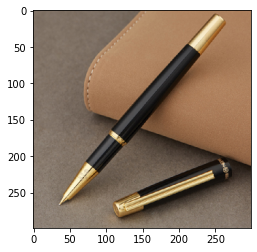

In [28]:
images4 = transform_img_fn([os.path.join('./','pen.jpeg')])
plt.imshow(images4[0]/2+0.5)
preds = model.predict(images4)
for x in decode_predictions(preds)[0]:
    print(x)

In [29]:
start = time.clock()
# generate the LIME image explainer
explainer = lime_image.LimeImageExplainer()
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')
start = time.clock()
# explain the image
explanation = explainer.explain_instance(
    images4[0].astype('double'), model.predict, top_labels=5, 
    hide_color=0, num_samples=1000)
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')

The time consumption of the function is:  0.0001253000000360771 (s).



The time consumption of the function is:  143.00579359999995 (s).


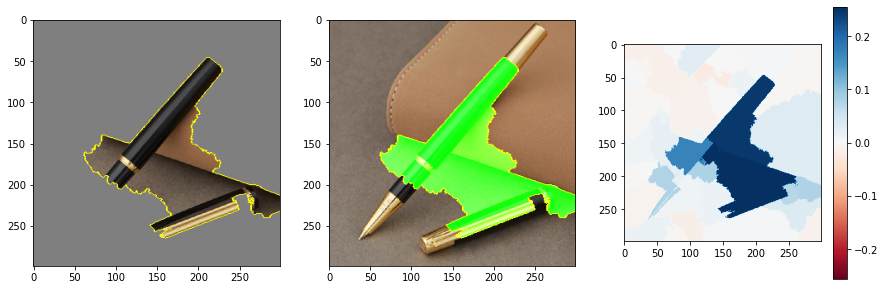

In [30]:
# plot the explanation results
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = True)

temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = False,
                                           num_features = 5,
                                           hide_rest = False)
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(temp1/2+0.5,mask1))
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(temp2/2+0.5,mask2))
plt.subplot(1,3,3)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

('n07697313', 'cheeseburger', 0.93599737)
('n04004767', 'printer', 0.0029413558)
('n07871810', 'meat_loaf', 0.0018052447)
('n07693725', 'bagel', 0.001248488)
('n07613480', 'trifle', 0.00030796448)


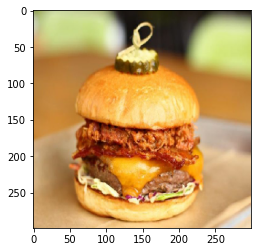

In [31]:
images5 = transform_img_fn([os.path.join('./','burger.jpeg')])
plt.imshow(images5[0]/2+0.5)
preds = model.predict(images5)
for x in decode_predictions(preds)[0]:
    print(x)

In [32]:
start = time.clock()
# generate the LIME image explainer
explainer = lime_image.LimeImageExplainer()
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')
start = time.clock()
# explain the image
explanation = explainer.explain_instance(
    images5[0].astype('double'), model.predict, top_labels=5, 
    hide_color=0, num_samples=1000)
end = time.clock()
print('The time consumption of the function is: ',end-start,'(s).')

The time consumption of the function is:  0.00016389999996135884 (s).



The time consumption of the function is:  148.86135639999986 (s).


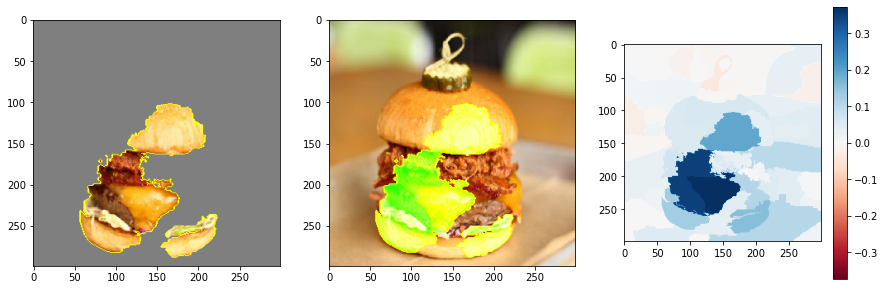

In [33]:
# plot the explanation results
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = True,
                                           num_features = 5,
                                           hide_rest = True)

temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0],
                                           positive_only = False,
                                           num_features = 5,
                                           hide_rest = False)
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(temp1/2+0.5,mask1))
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(temp2/2+0.5,mask2))
plt.subplot(1,3,3)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()